## load libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import os, sys, shutil
from glob import glob
import numpy as np
import pandas as pd

In [3]:
sys.path.insert(0, "../")
from utils.DLutils import *
from utils.vizutils import *

In [4]:
DEEPREPVIZ_REPO = os.path.abspath("../../Deep-confound-control-v2/")
if DEEPREPVIZ_REPO not in sys.path: sys.path.append(DEEPREPVIZ_REPO)

from DeepRepVizBackend import DeepRepVizBackend

OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## DeepRepVizBackend

### Init DeepRepVizBackend using the attributes table

In [12]:
DATASET_UNIQUE_ID = 't'
attributes_table = f"../dataset/toybrains_n10000_lblmidr_covsite_{DATASET_UNIQUE_ID}/toybrains_n10000_lblmidr_covsite_{DATASET_UNIQUE_ID}.csv"
df_attrs = pd.read_csv(attributes_table)
# print(df_attrs.columns)
ID_col = 'subjectID'
label = 'lbl_lesion'

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/toybrains_n10000_lblmidr_covsite_t/toybrains_n10000_lblmidr_covsite_t.csv'

In [ ]:
drv_backend = DeepRepVizBackend(        
                  conf_table=df_attrs,
                  ID_col=ID_col, label_col=label,
                  best_ckpt_by='loss', best_ckpt_metric_should_be='min',
                  debug=True)

[log] Potential Confounders to be assessed:
[log] 	 cov_site                   predtype: classif_binary    uniques = {'siteB': 5055, 'siteA': 4945}
[log] 	 lbl_lesion                 predtype: classif_binary    uniques = {True: 5045, False: 4955}
[log] 	 brain-int_border           predtype: classif           uniques = {'1-slateblue': 2575, '3-darkblue': 2542, '2-darkslateblue': 2447, '0-mediumslateblue': 2436}
[log] 	 brain-int_fill             predtype: regression        
[log] 	 brain-vol_radmajor         predtype: regression        
[log] 	 brain-vol_radminor         predtype: regression        
[log] 	 brain_thick                predtype: regression        
[log] 	 shape-botl_curv            predtype: regression        
[log] 	 shape-botl_int             predtype: classif           uniques = {'0-indianred': 1718, '1-salmon': 1683, '4-lightgreen': 1681, '5-darkgreen': 1655, '2-lightsalmon': 1632, '3-palegoldenrod': 1631}
[log] 	 shape-botl_vol-rad         predtype: regression       

In [13]:
# Make a list of all models (different model architecture or different runs/versions of the same model architecture)
# trained on the current dataset
logdirs = sorted([logdir for logdir in glob(f"log/toybrains-{DATASET_UNIQUE_ID}*/*/deeprepvizlog/") if 'debug' not in logdir])
logdirs

['log/toybrains-t0_SimpleCNN_cls1-fea3/trial_0/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea3/trial_1/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea3/trial_2/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea3/trial_3/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea3/trial_4/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/trial_0/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/trial_1/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/trial_2/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/trial_3/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/trial_4/deeprepvizlog/',
 'log/toybrains-t0_SimpleCNN_cls1-fea64/version_0/deeprepvizlog/',
 'log/toybrains-t1_SimpleCNN_cls1-fea3/trial 0/deeprepvizlog/',
 'log/toybrains-t1_SimpleCNN_cls1-fea3/trial 1/deeprepvizlog/',
 'log/toybrains-t1_SimpleCNN_cls1-fea3/trial 2/deeprepvizlog/',
 'log/toybrains-t1_SimpleCNN_c

### Load the trained model log dirs

In [14]:
# load all of the models' logs one by one
for logdir in logdirs:
    drv_backend.load_log(logdir)

In [15]:
# the logs are loaded in drv_backend.deeprepvizlogs
drv_backend._pprint_deeprepvizlogs()

----------------------------------------------------------------------------------------------------
DeepRepViz log no.1: 
log/toybrains-t4_SimpleCNN_cls1-fea3/trial_0/deeprepvizlog/
	n(samples)        : 10000
	IDs               : [0 1 2] ... [9997 9998 9999]
	labels            : [ True False  True] ... [False False  True]
	n(checkpoints)    : 38
			   Each checkpoint has the following data: 
			   acts.shape : (10000, 3)
			   acts_3D.shape : (10000, 3)
			   preds_0.shape : (10000,)
			   metrics : <class 'dict'> | keys: ['loss', 'BAC', 'D2']
			   weights_0 : <class 'list'> | len: 3
			   biases_0 : <class 'float'> 
			   act_metrics : <class 'dict'> | keys: ['dcor', 'mi', 'con', 'costeta', 'r2']
	best checkpoint   : best_ckpt_idx = 37 	 name = epoch37-step001900
			   {'loss': '0.23', 'BAC': '0.93', 'D2': '0.66'}

	attributes table  : shape = (10000, 29)
			   ID_col = subjectID 	 label_col = lbl_lesion  	 n(attrs cols) = 28
			   attrs = ['cov_site', 'brain-int_border', 'brain-int

### downsample the activations to 3D

In [16]:
# downsample the activations to 3D if not already done
drv_backend.downsample_activations()

/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t4_SimpleCNN_cls1-fea3/trial_0/deeprepvizlog/. Skipping ...
  warnings.warn(f"The activations have already been reduced to 3D for {log_key}. Skipping ...")
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t4_SimpleCNN_cls1-fea3/trial_1/deeprepvizlog/. Skipping ...
  warnings.warn(f"The activations have already been reduced to 3D for {log_key}. Skipping ...")
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t4_SimpleCNN_cls1-fea3/trial_2/deeprepvizlog/. Skipping ...
  warnings.warn(f"The activations have already been reduced to 3D for {log_key}. Skipping ...")
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend

Reducing activations to 3D using PCA


100%|██████████| 44/44 [00:02<00:00, 15.58it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t0_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/. Skipping ...
  warnings.warn(f"The activations have already been reduced to 3D for {log_key}. Skipping ...")
100%|██████████| 50/50 [00:04<00:00, 10.78it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t0_SimpleCNN_cls1-fea64/version_0/deeprepvizlog/. Skipping ...
  warnings.warn(f"The activations have already been reduced to 3D for {log_key}. Skipping ...")
100%|██████████| 27/27 [00:01<00:00, 15.10it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:202: UserWarning: The activations have already been reduced to 3D for log/toybrains-t1_SimpleCNN_cls1-fea3/trial_0/deeprepvizlog/. Skipping ...
  warnings.war

### Create DeepRepViz v1 frontend csv

In [17]:
# you can also ask the backend to create a table compatible with the DeepRepViz v1 frontend for each log individually
for logdir in logdirs:
    # internally this will also downsample the activations to 3D using PCA and save them in deeprepvizlogs
    df = drv_backend.convert_log_to_v1_table(log_key=logdir, 
                                             unique_name=logdir.split('/')[-4])

100%|██████████| 37/37 [00:02<00:00, 17.67it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:376: UserWarning: The file log/toybrains-t0_SimpleCNN_cls1-fea3/trial_0/deeprepvizlog//DeepRepViz-v1-toybrains-t0_SimpleCNN_cls1-fea3.csv already exists. Skipping saving the table.
  warnings.warn(f"The file {v1_table_path} already exists. Skipping saving the table.")
100%|██████████| 50/50 [00:02<00:00, 17.79it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:376: UserWarning: The file log/toybrains-t0_SimpleCNN_cls1-fea3/trial_1/deeprepvizlog//DeepRepViz-v1-toybrains-t0_SimpleCNN_cls1-fea3.csv already exists. Skipping saving the table.
  warnings.warn(f"The file {v1_table_path} already exists. Skipping saving the table.")
100%|██████████| 9/9 [00:00<00:00, 17.90it/s]
/ritter/roshan/workspace/Deep-confound-control-v2/DeepRepVizBackend.py:376: UserWarning: The file log/toybrains-t0_SimpleCNN_cls1-fea3/trial_2/deeprepvizlog//DeepRepViz-v1-toybra

### Compute metrics

In [10]:
# The backend can be asked to compute metrics for specific logdirs in the deeprepvizlogs
drv_backend.debug = False
for i, logdir in enumerate(logdirs):
    # you can first verify check if the metrics have been computed and stored already 
    metrics = ['dcor', 'mi', 'con', 'costeta', 'r2']
    existing_metrics = drv_backend.get_metrics(logdir, ckpt_idx='best')
    if existing_metrics is not None:
        metrics = [m for m in metrics if m not in existing_metrics]
        print(f"Skipping {list(existing_metrics.keys())} for {logdir}. As they have already been computed.")

    # it will compute it and store it in the metametadata.json file of the logdirs
    if len(metrics) > 0:
        result = drv_backend.compute_metrics(log_key=logdir,
                                             metrics=metrics,
                                            #   covariates=['lbl_lesion','cov_site', 'brain-int_fill','shape-midr_curv', 'shape-midr_vol-rad'], 
                                             ckpt_idx='best')
    # the computed metrics is also additionally returned as a dictionary
    # display(result)

100%|██████████| 29/29 [00:00<00:00, 44.35it/s]
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_activ

Skipping ['dcor', 'mi', 'con', 'costeta', 'r2'] for log/toybrains-t4_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/. As they have already been computed.
Skipping ['dcor', 'mi', 'con', 'costeta', 'r2'] for log/toybrains-t4_SimpleCNN_cls1-fea64/version_0/deeprepvizlog/. As they have already been computed.


In [18]:
# get all the computed metrics as a dict
for i, logdir in enumerate(logdirs):
    scores = drv_backend.get_metrics(logdir, ckpt_idx='best')
    viz_rep_metrics(scores, title=f"{logdir.split('/')[-4]}")

TypeError: object of type 'NoneType' has no len()

### Run the above for all other dataset variations
you can prepare a python script similar to 

```bash
python3 lbl1cov1_3-backend.py
```

The results will be updated within the `deeprepvizlog` files

## Summarize all results

In [76]:
all_results = {}
logdirs = sorted([log for log in glob(f"log/toybrains-t*/*/deeprepvizlog/") if 'debug' not in log])

for logdir in logdirs:
    print("loading:", logdir)
    drv_backend = DeepRepVizBackend()
    drv_backend.load_log(logdir)
    log = drv_backend.deeprepvizlogs[logdir]
    ckpt_idx = log['best_ckpt_idx']
    ckptname, log_ckpt = log['checkpoints'][ckpt_idx]
    logdirname = logdir.split('/')[-4].replace('toybrains-','')
    model_setting = logdirname.split('_')[-1]
    logdirname = logdirname.replace('_'+model_setting, '')
    # print('='*100,'\n', method_name, "at ckpt =", ckptname)
    # print(log.keys())
    # print("Model accuracy =", log_ckpt['metrics']) 
    result = {("Model",k): v for k,v in log_ckpt['metrics'].items()}
    for metric_name, metric_scores in log_ckpt['act_metrics'].items():
        # print('-'*100,"\nMetric =", metric_name, '\n', '-'*100,)
        for key in ['lbl_lesion', 'cov_site', 'brain-int_fill', 'shape-midr_curv', 'shape-midr_vol-rad']:
            result.update({(key, metric_name): metric_scores[key]})
            # print("{} = {:.4f}".format(key, metric_scores[key]))

    all_results.update({(model_setting, logdirname): result})

df_results = pd.DataFrame.from_dict(all_results, orient='index')
# sort the dataframe by the two levels of column headers
df_results = df_results.sort_index(axis=1, level=[0,1]).sort_index()
df_results.style.bar()


loading: log/toybrains-t0_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/
[WARN] conf_table (=None) provided is neither a pandas Dataframe nor a path to a table.Skipping all conf_table operations.. 
loading: log/toybrains-t0_SimpleCNN_cls1-fea64/version_0/deeprepvizlog/
[WARN] conf_table (=None) provided is neither a pandas Dataframe nor a path to a table.Skipping all conf_table operations.. 
loading: log/toybrains-t1_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/
[WARN] conf_table (=None) provided is neither a pandas Dataframe nor a path to a table.Skipping all conf_table operations.. 
loading: log/toybrains-t1_SimpleCNN_cls1-fea64/version_0/deeprepvizlog/
[WARN] conf_table (=None) provided is neither a pandas Dataframe nor a path to a table.Skipping all conf_table operations.. 
loading: log/toybrains-t2_SimpleCNN_cls1-fea3/version_0/deeprepvizlog/
[WARN] conf_table (=None) provided is neither a pandas Dataframe nor a path to a table.Skipping all conf_table operations.. 
loading: log/toybr

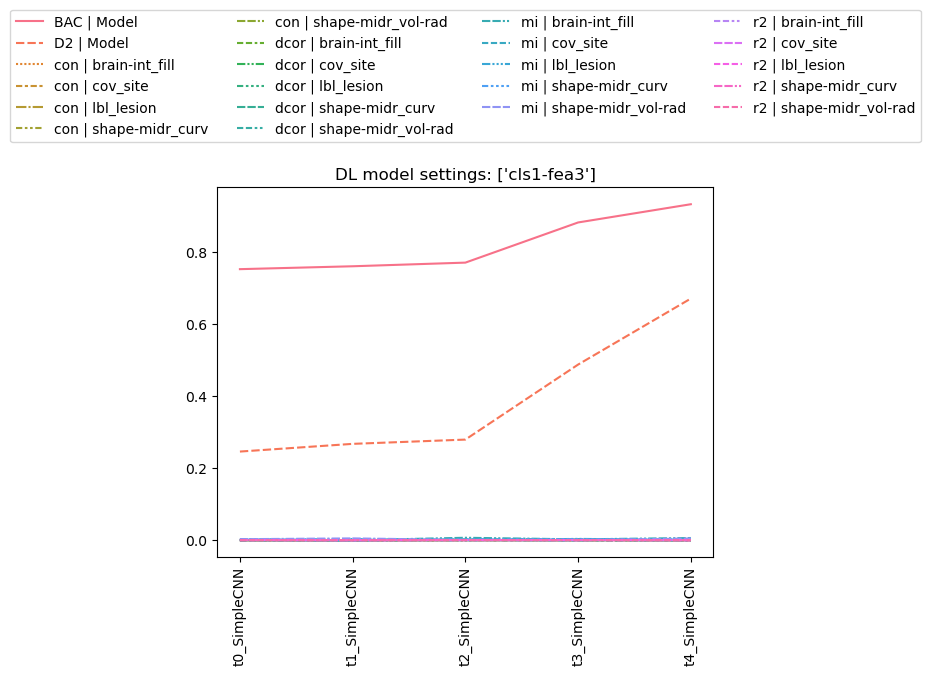

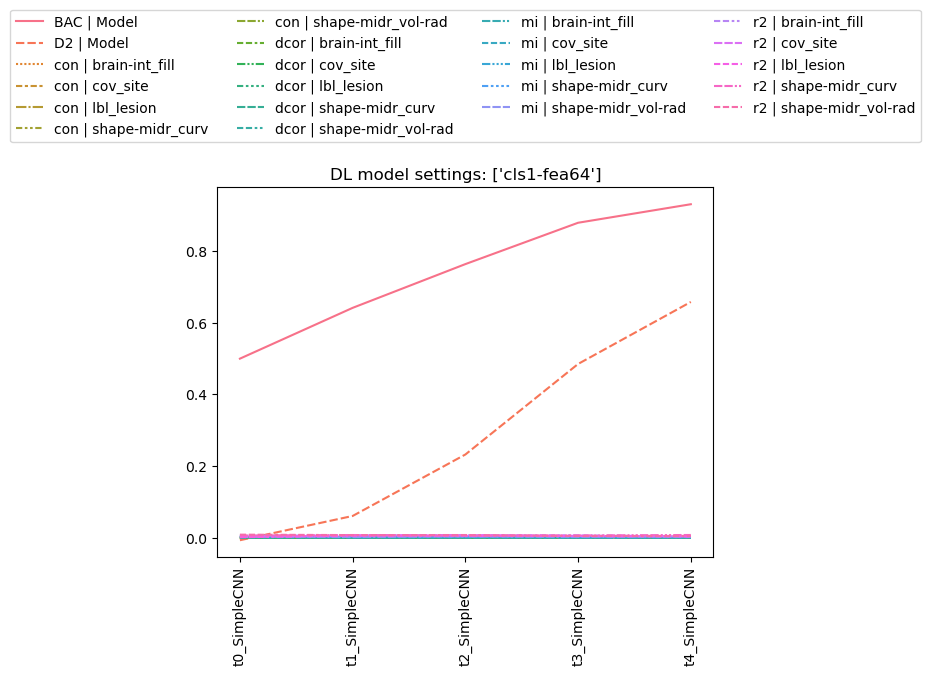

In [77]:
# take the absolute of the costheta
for feas, dfi in df_results.copy().reset_index(level=0).groupby("level_0"):
    # drop the loss
    dfi = dfi.drop(columns=[('Model', 'loss')])
    # flatten the multi-index columns
    dfi.columns = [' | '.join(col[::-1]).strip() for col in dfi.columns.values]
    # sort the columns alphabetically
    dfi = dfi.reindex(sorted(dfi.columns), axis=1)
    # drop the costeta columns
    dfi = dfi.filter(regex='^(?!.*costeta)')

    # plot the results
    ax = sns.lineplot(dfi)
    sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.5), ncols=4)
    plt.xticks(rotation=90)
    plt.title(f"DL model settings: {feas.split('_')}")
    plt.show()


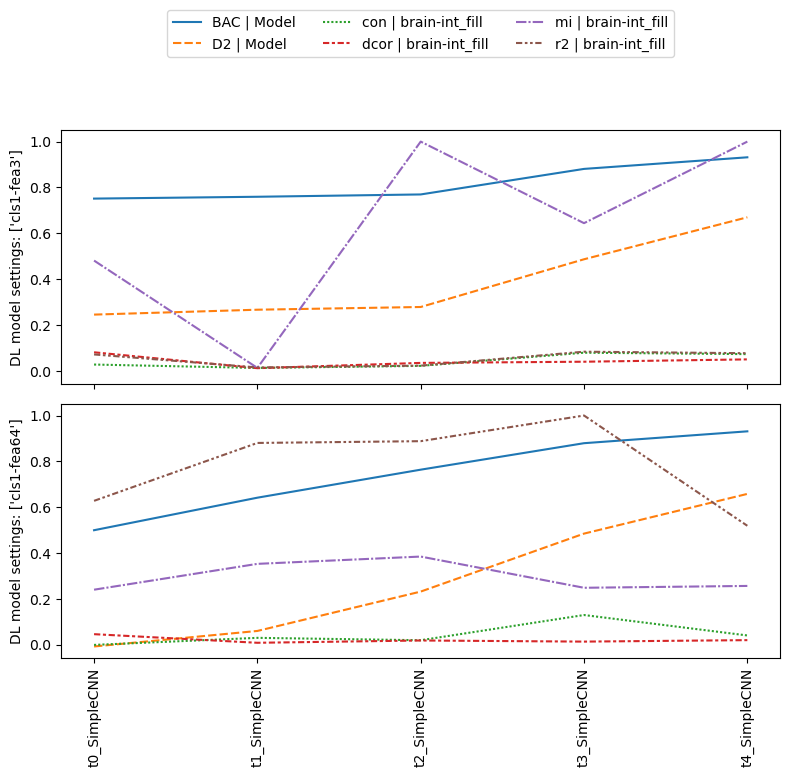

In [90]:
filter = "Model|brain-int_fill" #|lbl_lesion|brain-int_fill 

# repeat by normalizing the metric scores
# take the absolute of the costheta
grps = df_results.copy().reset_index(level=0)
grps = grps.rename(columns={'level_0': 'DL Model settings'})

fig, axes = plt.subplots(len(grps), 1, sharex=True, sharey=True,
                         figsize=(8, 8))
axes = axes.flatten()

for i,(feas, dfi) in enumerate(grps):
    # drop the loss
    dfi = dfi.drop(columns=[('Model', 'loss')])
    # flatten the multi-index columns
    dfi.columns = [' | '.join(col[::-1]).strip() for col in dfi.columns.values]
    # sort the columns alphabetically
    dfi = dfi.reindex(sorted(dfi.columns), axis=1)
    # drop the costeta columns
    dfi = dfi.filter(regex='^(?!.*costeta)')

    metric_cols = dfi.columns.str.contains('dcor|mi|con|r2')
    dfi.loc[:, metric_cols] = dfi.loc[:, metric_cols].apply(
        lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)
    
    # apply additional user-defined filters
    dfi = dfi.filter(regex=filter)

    # plot the results
    ax = axes[i]
    ax = sns.lineplot(dfi, ax=ax, legend=i==0)
    g = sns.FacetGrid( row='DL Model settings')
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6)
    ax.set_ylabel(f"DL model settings: {feas.split('_')}")
    if i==0:
        sns.move_legend(ax, loc="upper center", 
                        bbox_to_anchor=(0.5, 1.5), ncols=3)
        
    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

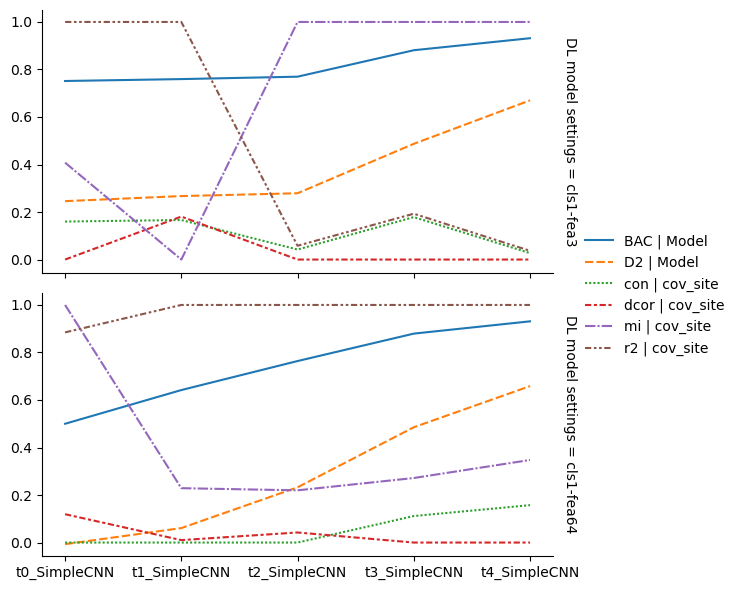

In [110]:
custom_filter = "Model|cov_site" #|lbl_lesion|cov_site|brain-int_fill 
dfi = df_results.copy()

# drop the loss
dfi = dfi.drop(columns=[('Model', 'loss')])
# flatten the multi-index columns
dfi.columns = [' | '.join(col[::-1]).strip() for col in dfi.columns.values]
# sort the columns alphabetically
dfi = dfi.reindex(sorted(dfi.columns), axis=1)
# drop the costeta columns
dfi = dfi.filter(regex='^(?!.*costeta)')
# apply additional user-defined filters
dfi = dfi.filter(regex=custom_filter)
dfi = dfi.reset_index(level=0).rename(columns={'level_0': 'DL model settings'})
# display(dfi)

# normalize the metric scores
metric_cols = dfi.columns.str.contains('dcor|mi|con|r2')
dfi.loc[:, metric_cols] = dfi.loc[:, metric_cols].apply(
    lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

g = sns.FacetGrid(dfi, row='DL model settings',  margin_titles=True, 
                  height=3, aspect=2)
g.map_dataframe(sns.lineplot)
g.add_legend()  
# plt.tight_layout()
plt.show()

#### test with a different 3D dimensionality reduction method?

In [19]:
# dim_reduct_method = TSNE(n_components=3, learning_rate='auto',
#                          init='random', perplexity=3) 

In [20]:
# %reload_ext tensorboard
# %tensorboard --logdir=./log/lightning_logs/
# !kill -9 1237900

#### Calculate other backend metrics ?